Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 1080, 1080)


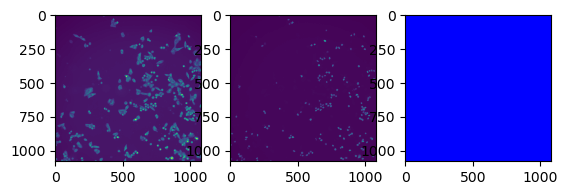

[[1775 1741 1731 ... 2117 2155 2179]
 [1610 1732 1530 ... 2081 2122 2137]
 [1625 1635 1682 ... 2067 2120 2202]
 ...
 [3281 3436 3369 ... 3988 3997 4169]
 [3279 3402 3459 ... 4146 4220 3989]
 [3411 3519 3430 ... 4204 4162 4055]]


True

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = np.load('data/image_0.npy')
# img = img.astype(np.uint8)
# img = np.transpose(img, (1, 2, 0))
print(img.shape)

img_4channel = np.zeros((img.shape[1], img.shape[2], 4), dtype=img.dtype)
img_4channel[:, :, 2] = img[0]
img_4channel[:, :, 3] = img[1]

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img[0])
plt.subplot(1, 3, 2)
plt.imshow(img[1])
plt.subplot(1, 3, 3)
plt.imshow(img_4channel)
plt.show()
print(img[0])


cv2.imwrite('data/image_0.png', img_4channel)

In [45]:
from cellpose import models, io

# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(model_type='nuclei')

# list of files
# PUT PATH TO YOUR FILES HERE!
file = 'data/image_0.png'

img = io.imread(file)

channels = [2, 3]
masks, flows, styles, diams = model.eval(img, diameter=None, channels=channels)

In [15]:
import numpy as np
from cellpose import models, io

# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(model_type='cyto2')

img = np.load('data/image_0.npy')
# img = img.astype(np.uint8)

channels = [2, 3]
masks, flows, styles, diams = model.eval(img)

In [40]:
import tifffile
import numpy as np
from cellpose import models, io

# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(model_type='nuclei')

img = tifffile.imread('data/tiff_data/0.tif')

print(img.shape)



(1080, 1080, 4)


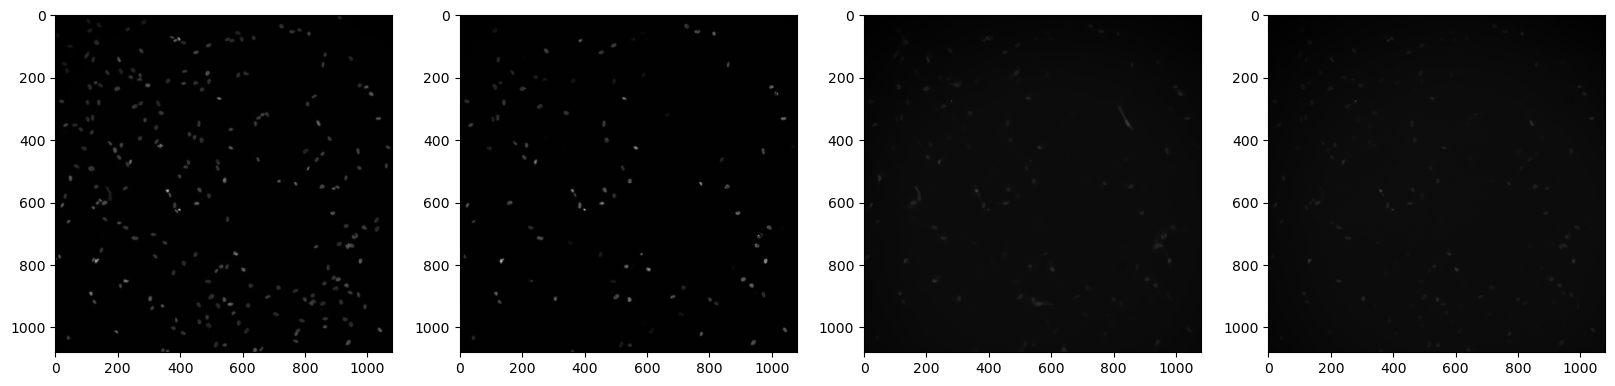

[[ 273  237 1758 1663]
 [ 286  202 1788 1765]
 [ 330  263 1744 1727]
 ...
 [ 416  212 2082 1977]
 [ 374  263 2062 1961]
 [ 362  183 2059 1934]]


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(img[:, :, 0], cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(img[:, :, 1], cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(img[:, :, 2], cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(img[:, :, 3], cmap='gray')
plt.show()
print(img[0])

In [48]:
channels = [[0, 0]]
masks, flows, styles, diams = model.eval(img, channels=channels)
print(masks.shape, flows[0].shape, styles.shape, diams)

(1080, 1080) (1080, 1080, 3) (256,) 30.0


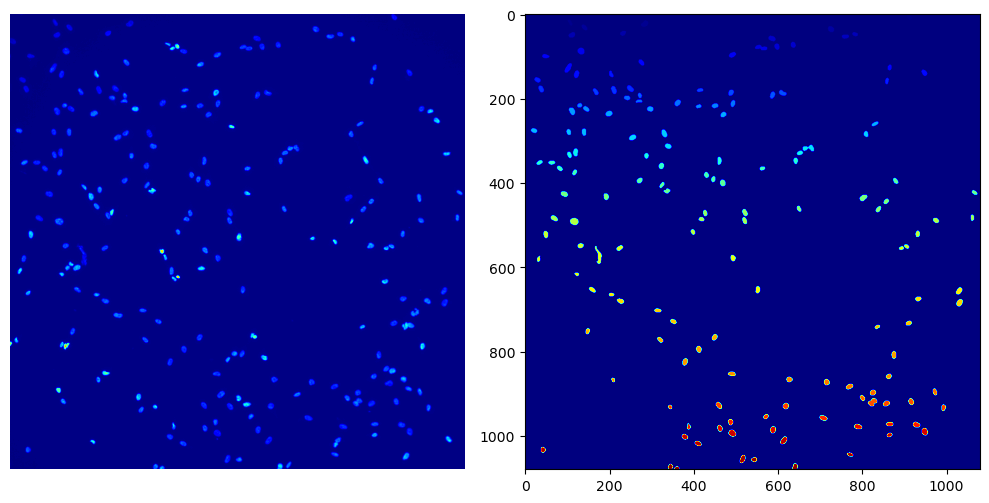

In [54]:
# display results
from matplotlib import pyplot as plt
from cellpose import plot

#plot grayscale of cell image, plot masks next to it
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img[:, :, 0], cmap='jet')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(masks, cmap='jet')
# plt.axis('off')
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd

n_bags = 4

df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

df['bins'] = pd.cut(df['a'], bins=n_bags, labels=[bins for bins in range(n_bags)])
df['fold'] = 0

In [51]:
df

,a,bins,fold
0,1,0,0
1,2,0,0
2,3,0,0
3,4,1,0
4,5,1,0
5,6,2,0
6,7,2,0
7,8,3,0
8,9,3,0
9,10,3,0


In [52]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = n_bags-1 , shuffle = True)
gen_skf = skf.split(df["a"] , y = df["bins"])

In [53]:
import tqdm

for index, (train_index, test_index) in enumerate(gen_skf):
    print(index)
    print(train_index)
    print(test_index)
    df['fold'][test_index] = index
    print('----------------')

0
[0 2 4 6 8 9]
[1 3 5 7]
----------------
1
[1 2 3 5 6 7 9]
[0 4 8]
----------------
2
[0 1 3 4 5 7 8]
[2 6 9]
----------------


c:\Users\hx57\AppData\Local\anaconda3\envs\jra\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\hx57\AppData\Local\Temp\ipykernel_5948\1868254681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fold'][test_index] = index
C:\Users\hx57\AppData\Local\Temp\ipykernel_5948\1868254681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fold'][test_index] = index
C:\Users\hx57\AppData\Local\Temp\ipykernel_5948\1868254681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [54]:
df

,a,bins,fold
0,1,0,1
1,2,0,0
2,3,0,2
3,4,1,0
4,5,1,1
5,6,2,0
6,7,2,2
7,8,3,0
8,9,3,1
9,10,3,2


In [61]:
for fold in range(n_bags):
    sample_train = df[df["fold"] != fold]
    sample_val = df[df["fold"] == fold]
    print(sample_train)
    print(sample_val)

    a bins  fold
0   1    0     1
2   3    0     2
4   5    1     1
6   7    2     2
8   9    3     1
9  10    3     2
   a bins  fold
1  2    0     0
3  4    1     0
5  6    2     0
7  8    3     0
    a bins  fold
1   2    0     0
2   3    0     2
3   4    1     0
5   6    2     0
6   7    2     2
7   8    3     0
9  10    3     2
   a bins  fold
0  1    0     1
4  5    1     1
8  9    3     1
   a bins  fold
0  1    0     1
1  2    0     0
3  4    1     0
4  5    1     1
5  6    2     0
7  8    3     0
8  9    3     1
    a bins  fold
2   3    0     2
6   7    2     2
9  10    3     2
    a bins  fold
0   1    0     1
1   2    0     0
2   3    0     2
3   4    1     0
4   5    1     1
5   6    2     0
6   7    2     2
7   8    3     0
8   9    3     1
9  10    3     2
Empty DataFrame
Columns: [a, bins, fold]
Index: []
